In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from scipy.stats import f_oneway, ttest_ind
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

In [29]:
import numpy as np

In [2]:

file_path = "/Users/yummy/Desktop/Portfolio/Laura's Den.csv"
df = pd.read_csv(file_path)

In [4]:
!which python

/Users/yummy/opt/anaconda3/envs/new_env/bin/python


In [3]:

# Comprehensive Analysis Step-by-Step

# Summary Statistics
summary_stats = df.describe()

# Correlation Analysis: Foot Traffic vs. Daily Sales
correlation = df["Foot_Traffic"].corr(df["Daily_Sales"])
#print(f"Correlation between Foot Traffic and Daily Sales: {correlation}")

# 3. Revenue Contribution by Category
category_revenue = df[["Fiction_Sales", "Non_Fiction_Sales", "Children_Sales"]].sum()

# 4. Conversion Rate Analysis
conversion_rate_mean = df["Conversion_Rate"].mean()
conversion_rate_trend = df[["Date", "Conversion_Rate"]]

# 5. Customer Satisfaction Distribution
satisfaction_distribution = df["Customer_Satisfaction"].value_counts().sort_index()

# 6. NPS Calculation
promoters = df["Promoters"].sum()
detractors = df["Detractors"].sum()
nps_score = ((promoters - detractors) / len(df)) * 100

In [4]:
print(f"Net Promoter Score (NPS): {nps_score}")

Net Promoter Score (NPS): -3.3333333333333335


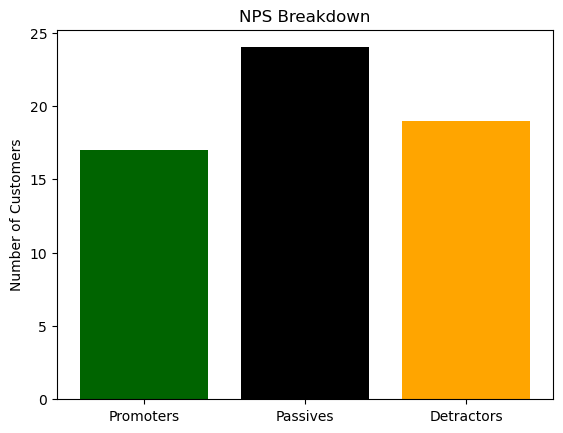

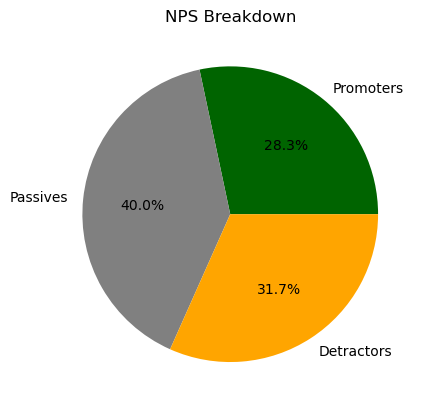

In [53]:

# Calculate counts
promoters_count = df["Promoters"].sum()
detractors_count = df["Detractors"].sum()
passives_count = len(df) - promoters_count - detractors_count

# Bar Chart
categories = ["Promoters", "Passives", "Detractors"]
values = [promoters_count, passives_count, detractors_count]

plt.bar(categories, values, color=["darkgreen", "black", "orange"])
plt.title("NPS Breakdown")
plt.ylabel("Number of Customers")
plt.show()

# Pie Chart
plt.pie(values, labels=categories, autopct="%1.1f%%", colors=["darkgreen", "grey", "orange"])
plt.title("NPS Breakdown")
plt.show()


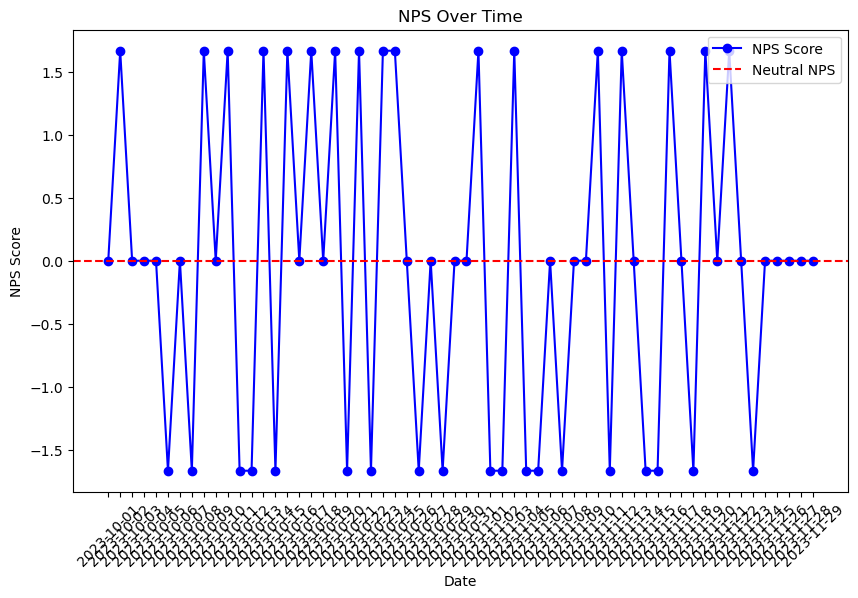

In [55]:
# Calculate NPS Over Time
df["NPS_Score"] = ((df["Promoters"] - df["Detractors"]) / len(df)) * 100
nps_trend = df.groupby("Date")["NPS_Score"].mean()

# Line Chart
plt.figure(figsize=(10, 6))
plt.plot(nps_trend, marker="o", color="blue", label="NPS Score")
plt.title("NPS Over Time")
plt.xlabel("Date")
plt.ylabel("NPS Score")
plt.axhline(0, color="red", linestyle="--", label="Neutral NPS")
plt.legend()
plt.xticks(rotation=45)
plt.show()


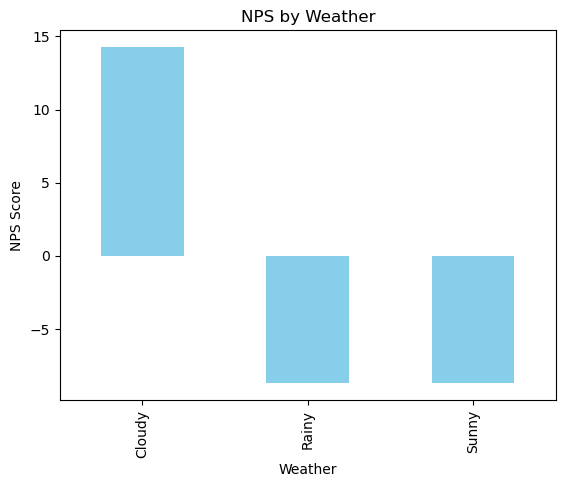

In [57]:
# Group by Segment (e.g., Weather)
segment_nps = df.groupby("Weather").apply(
    lambda x: ((x["Promoters"].sum() - x["Detractors"].sum()) / len(x)) * 100
)

# Bar Chart
segment_nps.plot(kind="bar", color="skyblue", title="NPS by Weather")
plt.ylabel("NPS Score")
plt.show()


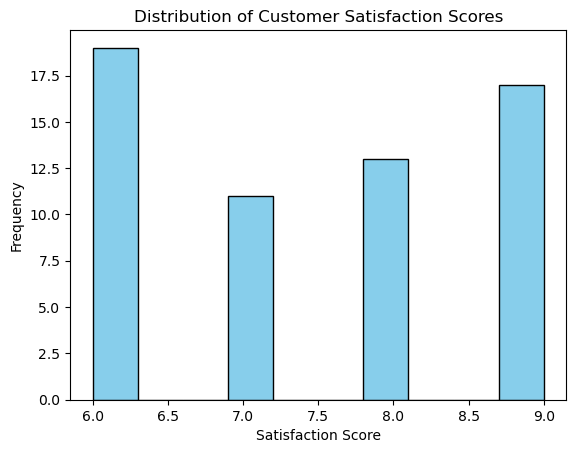

In [58]:
# Histogram of Satisfaction Scores
df["Customer_Satisfaction"].plot(kind="hist", bins=10, color="skyblue", edgecolor="black")
plt.title("Distribution of Customer Satisfaction Scores")
plt.xlabel("Satisfaction Score")
plt.ylabel("Frequency")
plt.show()


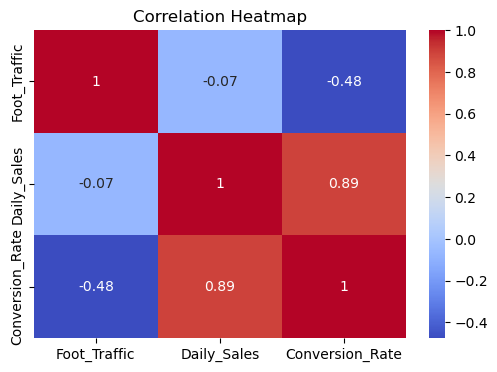

In [9]:
# Visualization: Step-by-Step

# Plot 1: Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[["Foot_Traffic", "Daily_Sales", "Conversion_Rate"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
#plt.close()
plt.show()

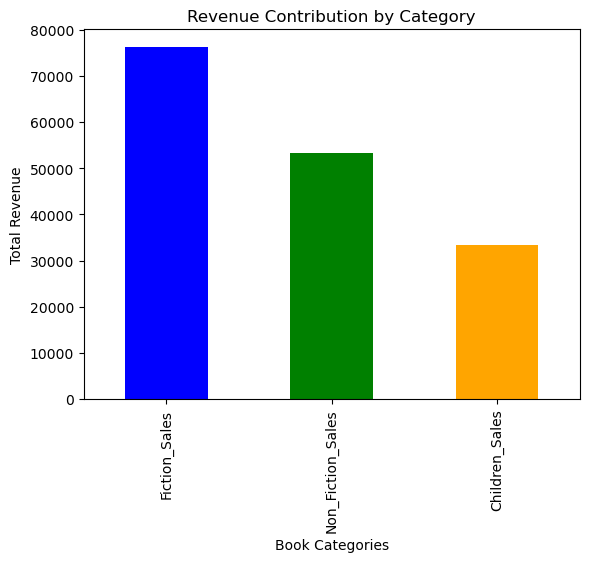

In [10]:
# Plot 2: Revenue Contribution by Category
category_revenue.plot(kind="bar", title="Revenue Contribution by Category", color=["blue", "green", "orange"])
plt.ylabel("Total Revenue")
plt.xlabel("Book Categories")
#plt.savefig("/mnt/data/revenue_contribution.png")
plt.show()
plt.close()


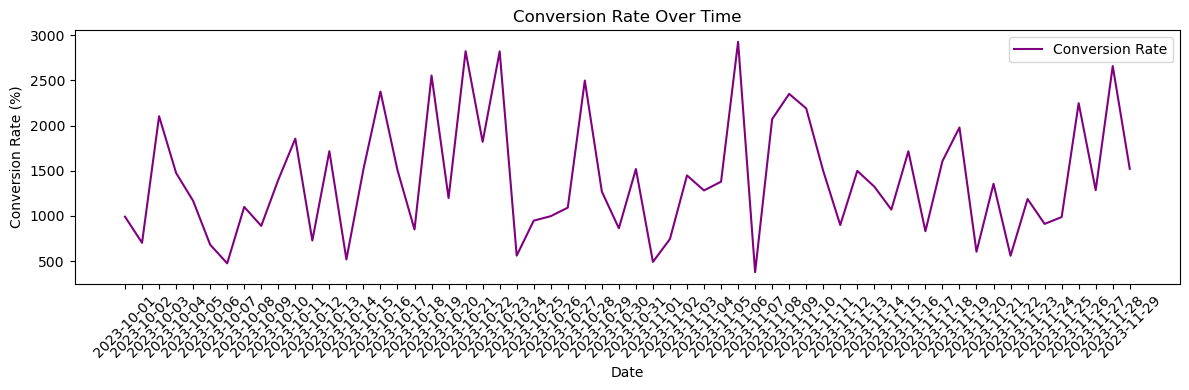

In [14]:

# Plot 3: Conversion Rate Over Time
plt.figure(figsize=(12, 4))
plt.plot(df["Date"], df["Conversion_Rate"], label="Conversion Rate", color="purple")
plt.title("Conversion Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Conversion Rate (%)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

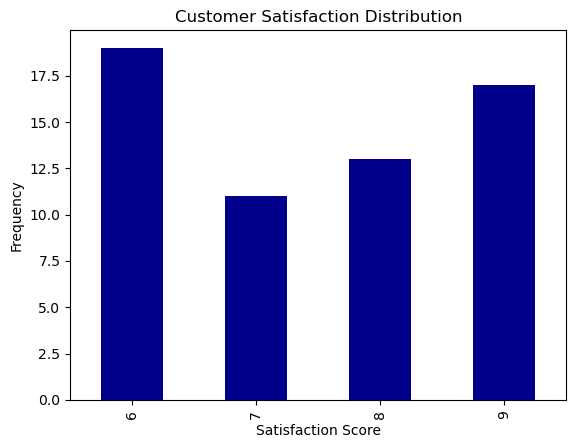

In [47]:
# Plot 4: Customer Satisfaction Distribution
satisfaction_distribution.plot(kind="bar", title="Customer Satisfaction Distribution", color="darkblue")
plt.xlabel("Satisfaction Score")
plt.ylabel("Frequency")
plt.show()


In [17]:
# Display Results
results = {
    "Summary Statistics": summary_stats,
    "Correlation (Foot Traffic vs. Daily Sales)": correlation,
    "Category Revenue Contribution": category_revenue,
    "Average Conversion Rate": conversion_rate_mean,
    "Net Promoter Score (NPS)": nps_score,
    "Plots Saved": [
        "/mnt/data/correlation_heatmap.png",
        "/mnt/data/revenue_contribution.png",
        "/mnt/data/conversion_rate_trend.png",
        "/mnt/data/customer_satisfaction_distribution.png"
    ]
}

results

{'Summary Statistics':        Foot_Traffic  Daily_Sales  Fiction_Sales  Non_Fiction_Sales  \
 count     60.000000    60.000000      60.000000          60.000000   
 mean     221.666667  2974.133333    1270.966667         888.066667   
 std       41.974434  1216.268891     418.728542         329.572186   
 min      151.000000  1064.000000     495.000000         301.000000   
 25%      195.250000  1965.750000     961.250000         589.500000   
 50%      223.000000  3004.000000    1233.500000         929.500000   
 75%      253.500000  3849.000000    1527.500000        1156.250000   
 max      299.000000  4993.000000    1998.000000        1471.000000   
 
        Children_Sales  Customer_Satisfaction  Conversion_Rate  Promoters  \
 count       60.000000              60.000000        60.000000  60.000000   
 mean       555.150000               7.466667      1400.364618   0.283333   
 std        228.974562               1.213856       662.565123   0.454420   
 min        201.000000       

In [18]:
from scipy.stats import f_oneway, ttest_ind

# Group data by Weather
sunny_sales = df[df["Weather"] == "Sunny"]["Daily_Sales"]
rainy_sales = df[df["Weather"] == "Rainy"]["Daily_Sales"]
cloudy_sales = df[df["Weather"] == "Cloudy"]["Daily_Sales"]

# ANOVA Test
anova_result = f_oneway(sunny_sales, rainy_sales, cloudy_sales)
print("ANOVA Test Result:", anova_result)

# Pairwise T-Test Example: Sunny vs Rainy
t_test_result = ttest_ind(sunny_sales, rainy_sales, equal_var=False)
print("T-Test (Sunny vs Rainy):", t_test_result)


ANOVA Test Result: F_onewayResult(statistic=0.7769188725257307, pvalue=0.46462811513601066)
T-Test (Sunny vs Rainy): Ttest_indResult(statistic=0.3395241547925217, pvalue=0.7358415156083341)


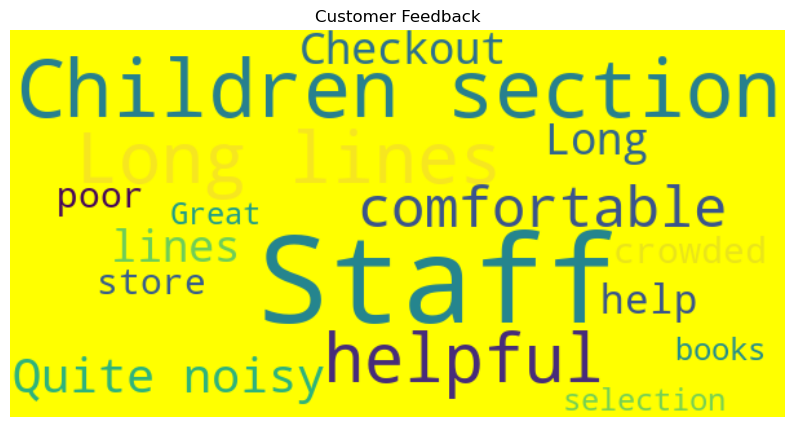

In [46]:
# from textblob import TextBlob
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# Add hypothetical feedback for demonstration
df["Feedback"] = np.random.choice(
    ["Great selection of books!", "The store was too crowded.", 
     "Children's section is poor", "Staff were very helpful.", 
     "Checkout lines were long.", "Quite noisy!", "Children's section is not comfortable.",
     "Long lines.", "No staff to help"],
    size=60
)

# Sentiment Analysis
df["Sentiment"] = df["Feedback"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Generate WordCloud
feedback_text = " ".join(df["Feedback"])
wordcloud = WordCloud(width=600, height=300, background_color="yellow").generate(feedback_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Customer Feedback")
plt.show()


In [59]:
#foot traffic vs. daily sales over time
import plotly.express as px

# Plotly Visualization
fig = px.line(df, x="Date", y=["Foot_Traffic", "Daily_Sales"], 
              labels={"value": "Count", "variable": "Metric"},
              title="Foot Traffic and Daily Sales Over Time")
fig.show()


In [61]:
#Revenue category
category_data = df[["Fiction_Sales", "Non_Fiction_Sales", "Children_Sales"]].sum().reset_index()
category_data.columns = ["Category", "Revenue"]

fig = px.bar(category_data, x="Category", y="Revenue", 
             color="Category", title="Revenue by Book Category")
fig.show()


In [27]:
#sankey diagram
import plotly.graph_objects as go

# Sankey Data
labels = ["Foot Traffic", "Fiction Sales", "Non-Fiction Sales", "Children Sales"]
source = [0, 0, 0]  # Foot Traffic to each category
target = [1, 2, 3]  # Fiction, Non-Fiction, Children
values = [df["Fiction_Sales"].sum(), df["Non_Fiction_Sales"].sum(), df["Children_Sales"].sum()]

# Create Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(pad=30, thickness=10, line=dict(color="black", width=0.5), label=labels),
    link=dict(source=source, target=target, value=values)
)])
fig.update_layout(title_text="Sankey Diagram: Foot Traffic to Sales Categories", font_size=10)
fig.show()


In [28]:
#A/B testing
# Create Test Groups
promo_group = df[df["Store_Promotions"] != "None"]["Daily_Sales"]
no_promo_group = df[df["Store_Promotions"] == "None"]["Daily_Sales"]

# Perform T-Test
t_test_ab = ttest_ind(promo_group, no_promo_group, equal_var=False)
print("T-Test (Promotions vs No Promotions):", t_test_ab)


T-Test (Promotions vs No Promotions): Ttest_indResult(statistic=-0.16338355304263025, pvalue=0.8709841032584632)


In [ ]:
# Interactive Dashboard wit Dash

# Import Dash libraries
from dash import Dash, html, dcc, Input, Output
import plotly.express as px

# Initialize Dash app
app = Dash(__name__)

# Create reusable figures
# 1. Line Chart: Foot Traffic vs. Daily Sales
line_fig = px.line(df, x="Date", y=["Foot_Traffic", "Daily_Sales"],
                   labels={"value": "Count", "variable": "Metric"},
                   title="Foot Traffic and Daily Sales Over Time")

# 2. Bar Chart: Revenue by Category
category_data = df[["Fiction_Sales", "Non_Fiction_Sales", "Children_Sales"]].sum().reset_index()
category_data.columns = ["Category", "Revenue"]
bar_fig = px.bar(category_data, x="Category", y="Revenue",
                 color="Category", title="Revenue by Book Category")

# 3. Sankey Diagram: Foot Traffic to Sales
labels = ["Foot Traffic", "Fiction Sales", "Non-Fiction Sales", "Children Sales"]
source = [0, 0, 0]  # Foot Traffic to each category
target = [1, 2, 3]  # Fiction, Non-Fiction, Children
values = [df["Fiction_Sales"].sum(), df["Non_Fiction_Sales"].sum(), df["Children_Sales"].sum()]
sankey_fig = go.Figure(data=[go.Sankey(
    node=dict(pad=15, thickness=20, line=dict(color="black", width=0.5), label=labels),
    link=dict(source=source, target=target, value=values)
)])
sankey_fig.update_layout(title_text="Sankey Diagram: Foot Traffic to Sales Categories", font_size=10)

# App Layout
app.layout = html.Div([
    html.H1("Bookstore Data Dashboard", style={'text-align': 'center'}),
    
    dcc.Tabs([
        dcc.Tab(label='Foot Traffic vs. Sales', children=[
            dcc.Graph(figure=line_fig)
        ]),
        dcc.Tab(label='Revenue by Category', children=[
            dcc.Graph(figure=bar_fig)
        ]),
        dcc.Tab(label='Sankey Diagram', children=[
            dcc.Graph(figure=sankey_fig)
        ])
    ])
])

# Run the Dash app
# Uncomment the line below to run the app locally
# app.run_server(debug=True)

# Save the Dash app code for hosting
dashboard_code_path = "/mnt/data/dash_dashboard.py"
with open(dashboard_code_path, "w") as f:
    f.write("""
from dash import Dash, html, dcc
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Load dataset
df = pd.read_csv('Bookstore_Comprehensive_Analysis.csv')

# Create reusable figures
line_fig = px.line
